<a href="https://colab.research.google.com/github/pathipakapujitha/capstone_phase-2/blob/main/Project_Vgg19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
# Define paths to your train and test data
train_data_dir = '/content/drive/MyDrive/Test-dataset/Train'
test_data_dir = '/content/drive/MyDrive/Test-dataset/Test'

In [ ]:
# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

In [ ]:
# Preprocess and augment data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 416 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 340 images belonging to 2 classes.


In [ ]:
# Load pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Add custom dense layers for classification
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

In [ ]:
# Combine base model with custom dense layers
model = Model(inputs=base_model.input, outputs=output)

In [ ]:
# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(train_generator, epochs=3, validation_data=test_generator)

Epoch 1/3
13/13 [==============================] - 571s 45s/step - loss: 1.6083 - accuracy: 0.7115 - val_loss: 0.6560 - val_accuracy: 0.8059
Epoch 2/3
13/13 [==============================] - 535s 42s/step - loss: 0.3494 - accuracy: 0.8918 - val_loss: 0.6407 - val_accuracy: 0.8029
Epoch 3/3
13/13 [==============================] - 549s 44s/step - loss: 0.4184 - accuracy: 0.9038 - val_loss: 0.7480 - val_accuracy: 0.7441


In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

11/11 [==============================] - 229s 21s/step - loss: 0.7480 - accuracy: 0.7441
Test Loss: 0.7479754090309143
Test Accuracy: 0.7441176176071167


In [ ]:
# Save the model
model.save('lung_disease_vgg19.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('lung_disease_vgg19.h5')

# Function to preprocess the image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale pixel values to [0, 1]
    return img_array

# Function to make predictions
def predict_image(image_path):
    img_array = preprocess_image(image_path)
    prediction = model.predict(img_array)
    if prediction < 0.5:
        return "Normal"
    else:
        return "Pneumonia"


In [ ]:
# Example usage:
image_path = '/content/drive/MyDrive/Test-dataset/Test/Normal/IM-0006-0001.jpeg'
result = predict_image(image_path)
print("Prediction:", result)

1/1 [==============================] - 1s 806ms/step
Prediction: Normal


In [ ]:
image_path = '/content/drive/MyDrive/Test-dataset/Test/Pneumonia/person33_virus_72.jpeg'
result = predict_image(image_path)
print("Prediction:", result)

1/1 [==============================] - 1s 1s/step
Prediction: Pneumonia


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Train the model
history = model.fit(train_generator, epochs=3, validation_data=test_generator)

Epoch 1/3
13/13 [==============================] - 532s 42s/step - loss: 0.2158 - accuracy: 0.9207 - val_loss: 0.6095 - val_accuracy: 0.7853
Epoch 2/3
13/13 [==============================] - 526s 42s/step - loss: 0.1791 - accuracy: 0.9279 - val_loss: 0.4868 - val_accuracy: 0.8059
Epoch 3/3
13/13 [==============================] - 551s 44s/step - loss: 0.1508 - accuracy: 0.9423 - val_loss: 0.4007 - val_accuracy: 0.8382


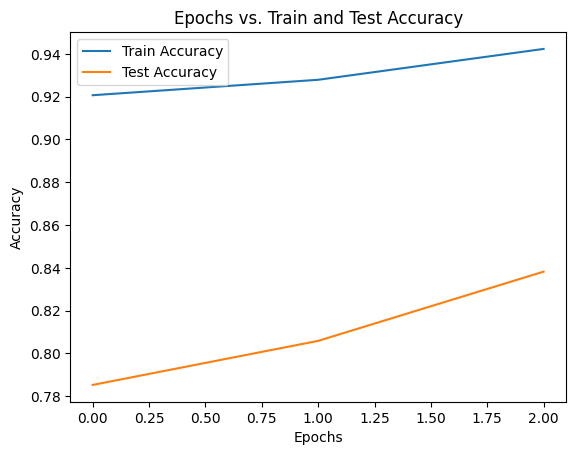

In [ ]:
# Plotting epochs vs. train and test accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs vs. Train and Test Accuracy')
plt.legend()
plt.show()

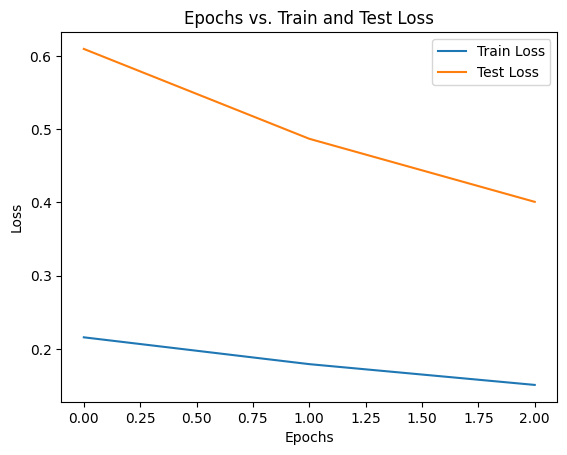

In [ ]:
# Plotting epochs vs. train and test loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs. Train and Test Loss')
plt.legend()
plt.show()